In [7]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile



In [20]:
data = pd.read_csv('D:/Python Code/Machine_Learning/Data/paribas_claims_train.csv', nrows=50000)
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [21]:
data.shape

(50000, 133)

In [24]:
# Select numerical data 
numerical = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_features = list(data.select_dtypes(include=numerical).columns)
data = data[numerical_features]
data.shape

(50000, 114)

In [26]:
 # Seperate train, test set 
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target', 'ID'], axis=1),
    data['target'],
    test_size=.3,
    random_state=0)
X_train.shape, X_test.shape

((35000, 112), (15000, 112))

In [28]:
# Check the mutual information between each features 
mi = mutual_info_classif(X_train.fillna(0), y_train)
mi

array([0.00194629, 0.00666922, 0.00389848, 0.00246584, 0.00449428,
       0.00730036, 0.00292466, 0.00439859, 0.02659126, 0.00240653,
       0.0172877 , 0.00555439, 0.02198681, 0.00736124, 0.00569916,
       0.00273931, 0.00179372, 0.00164123, 0.00122547, 0.01168142,
       0.        , 0.00320715, 0.0033606 , 0.00349264, 0.00101179,
       0.00150648, 0.00397265, 0.00245921, 0.0084923 , 0.00379376,
       0.00593133, 0.00268461, 0.00303404, 0.00489477, 0.00718065,
       0.00326355, 0.00466332, 0.00391255, 0.0059125 , 0.00297328,
       0.0067172 , 0.00451358, 0.00480923, 0.03906756, 0.00597463,
       0.00284134, 0.00246527, 0.00294594, 0.00409469, 0.00221306,
       0.00512845, 0.00592965, 0.00444479, 0.0164425 , 0.00725761,
       0.0053448 , 0.00733921, 0.00347811, 0.        , 0.00288166,
       0.00217512, 0.00587197, 0.00720329, 0.00497192, 0.00449347,
       0.00103923, 0.00056417, 0.00170835, 0.00710214, 0.00213532,
       0.00623043, 0.00794373, 0.00335093, 0.00141647, 0.00339

In [29]:
# Now sort the mutual information with their features name
mi = pd.Series(mi)
mi.index = X_train.columns 
mi.sort_values(ascending=False)

v50     0.039068
v10     0.026591
v14     0.021987
v129    0.018868
v12     0.017288
          ...   
v124    0.000812
v80     0.000564
v96     0.000564
v23     0.000000
v68     0.000000
Length: 112, dtype: float64

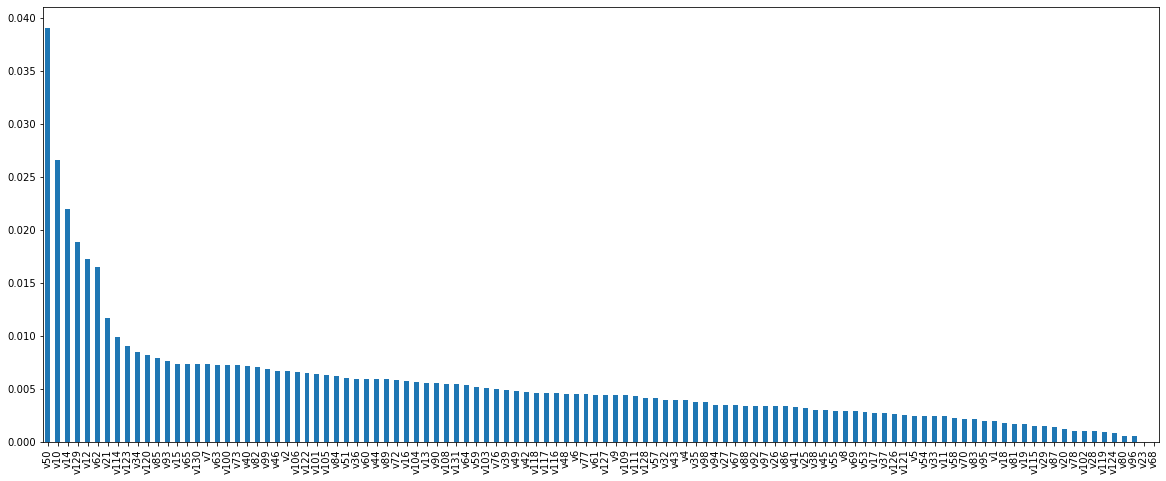

In [30]:
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [31]:
# Select top 10 features 
top10 = SelectKBest(mutual_info_classif, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[top10.get_support()]

Index(['v10', 'v12', 'v14', 'v21', 'v34', 'v50', 'v62', 'v72', 'v114', 'v129'], dtype='object')